In [1]:
#Imporing liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\PRATIK PANIGRAHI\Desktop\Telecom_customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Data Exploration

In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

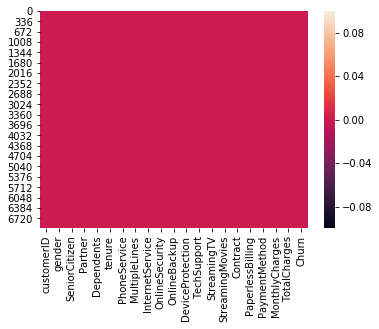

In [11]:
sns.heatmap(data.isnull())

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


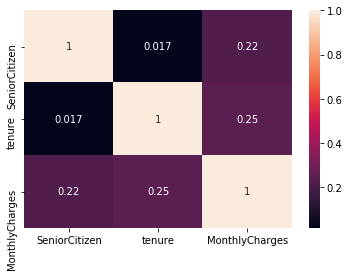

In [15]:
sns.heatmap(data.corr(),annot=True)

In [16]:
#target variable
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

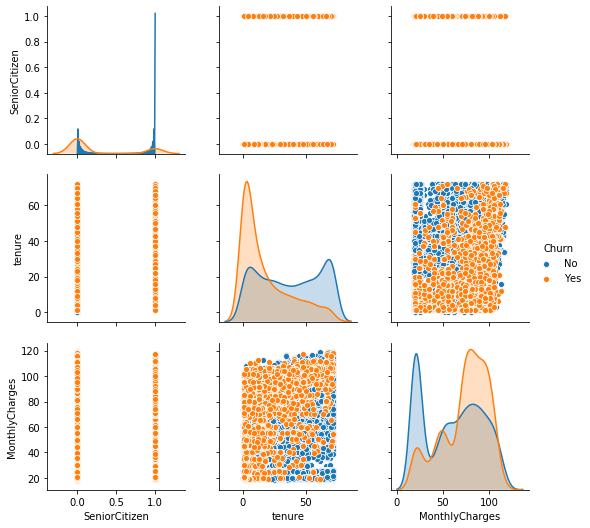

In [18]:
sns.pairplot(data,hue='Churn')

In [20]:
#counting target variables
from collections import Counter
Counter(data['Churn'])

Counter({'No': 5174, 'Yes': 1869})

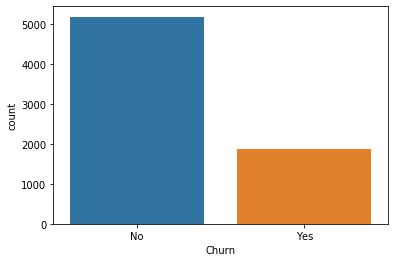

In [23]:
#plotting the count ofthe target data
sns.countplot(x='Churn',data=data)

In [24]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

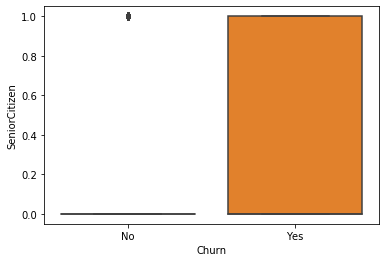

In [30]:
#checking outliers against target variable
sns.boxplot('Churn','SeniorCitizen', data = data)

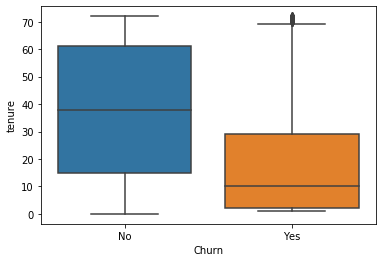

In [31]:
sns.boxplot('Churn','tenure', data = data)

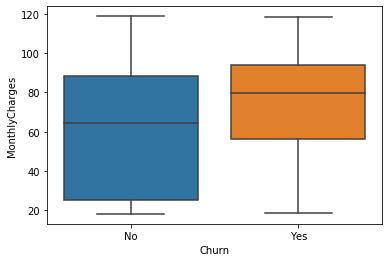

In [32]:
sns.boxplot('Churn','MonthlyCharges', data = data)

In [9]:
#changing categorical value to numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in data.columns:
    data[col]=le.fit_transform(data[col])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


After converting the categorical value to nuemerical value in 'Churn' yes-->1,no-->0 

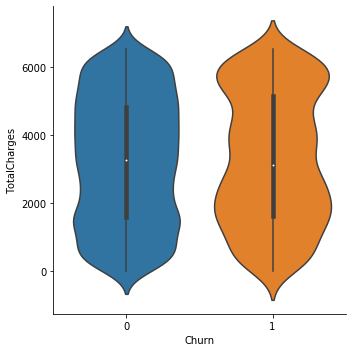

In [47]:
sns.catplot(x='Churn',y='TotalCharges',kind='violin',data=data)

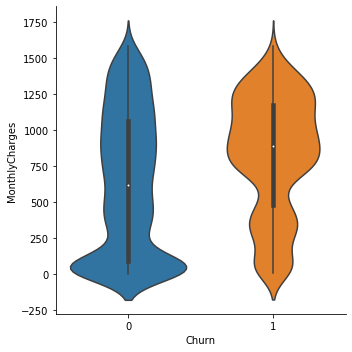

In [48]:
sns.catplot(x='Churn',y='MonthlyCharges',kind='violin',data=data)

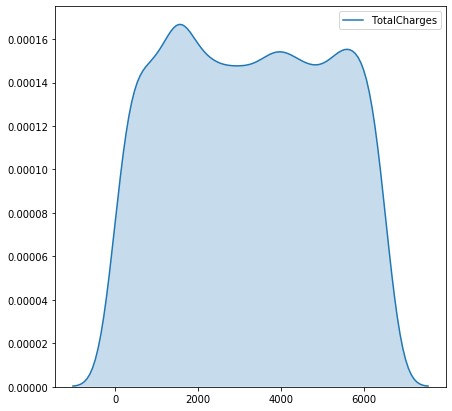

In [37]:
plt.figure(figsize=(7,7))
sns.kdeplot(data['TotalCharges'],shade=True);

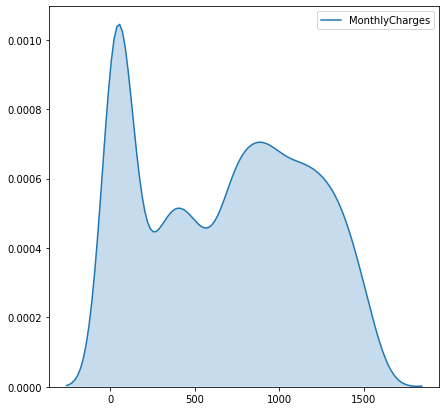

In [38]:
plt.figure(figsize=(7,7))
sns.kdeplot(data['MonthlyCharges'],shade=True);

In [49]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


In [10]:
#chcking outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[0.91189045, 1.00955867, 0.43991649, ..., 1.13176632, 0.39860759,
        0.60102348],
       [0.21690598, 0.99053183, 0.43991649, ..., 0.38773977, 0.94876238,
        0.60102348],
       [0.47070074, 0.99053183, 0.43991649, ..., 0.51731743, 1.64188328,
        1.66382851],
       ...,
       [0.07574495, 1.00955867, 0.43991649, ..., 1.14221613, 0.13968008,
        0.60102348],
       [1.18683477, 0.99053183, 2.27315869, ..., 0.23297901, 0.31653445,
        1.66382851],
       [0.63694614, 0.99053183, 0.43991649, ..., 1.4723266 , 1.13801338,
        0.60102348]])

In [11]:
threshold=3
print(np.where(z>3))
df=data[(z<3).all(axis=1)]
df

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,1274,6104,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,1075,1550,0
8,5604,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,1371,2646,1
9,4534,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,482,3022,0
10,6871,1,0,1,1,13,1,0,0,2,...,0,0,0,0,0,1,3,375,4823,0
11,5288,1,0,0,0,16,1,0,2,1,...,1,1,1,1,2,0,1,8,2836,0
12,5751,1,0,1,0,58,1,2,1,0,...,2,0,2,2,1,0,1,1288,4693,0


In [7]:
data.shape,df.shape

((7043, 21), (6361, 21))

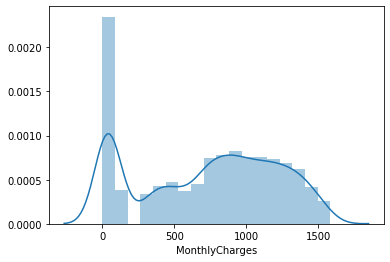

In [8]:
#checking skewness
sns.distplot(df['MonthlyCharges'])

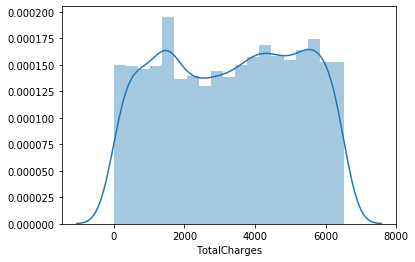

In [60]:
sns.distplot(df['TotalCharges'])

In [61]:
#target value count
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Feature Scaling

In [12]:
data.drop('customerID',axis=1,inplace=True)

In [13]:
data.shape

(7043, 20)

In [14]:
x=data.drop('Churn',axis=1)
y=data['Churn']

In [15]:
x.shape,y.shape

((7043, 19), (7043,))

In [16]:
#Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [18]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x = mx.fit_transform(x)

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

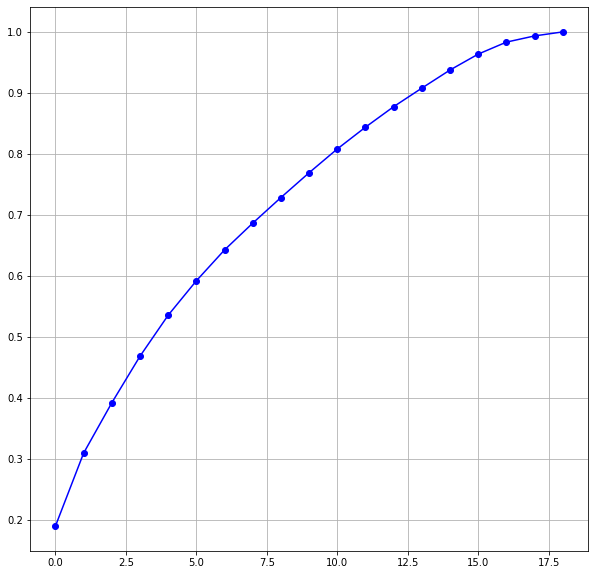

In [20]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.grid()

In [21]:
pca=PCA(n_components=10)
x=pca.fit_transform(x)

In [22]:
print(x)

[[-7.34198291e-01 -6.58339678e-02  7.71875075e-01 ...  1.14722026e-01
   7.10562024e-01  2.43818960e-01]
 [-5.69962025e-01  7.85428478e-01 -5.06429968e-01 ...  6.05843945e-01
  -6.28022417e-02 -2.16192269e-01]
 [-1.01327248e+00  2.47955491e-01 -3.63284424e-02 ... -1.11189844e-01
  -9.06178587e-04  2.36234201e-01]
 ...
 [-4.84455996e-01  4.71476428e-01  1.22176851e+00 ... -9.49714372e-02
  -1.38447838e-02  1.92269167e-01]
 [-8.87289815e-01 -5.74354908e-01  9.78738980e-01 ...  3.15398989e-01
  -4.08565186e-01  7.84396733e-02]
 [ 8.69325808e-01 -2.68514560e-01 -9.85323669e-01 ...  2.28837510e-01
  -6.03880097e-01 -2.36404836e-02]]


In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5493, 19)
(1550, 19)
(5493,)
(1550,)


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
models = []
models.append(('lg', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('gnb', GaussianNB()))
models.append(('rfc',RandomForestClassifier()))

In [25]:
def my_model(models):
    models.fit(x_train,y_train)
    pred=models.predict(x_test)
    print(accuracy_score(y_test,pred)*100)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [26]:
my_model(lg)

80.90322580645162
[[1024  109]
 [ 187  230]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1133
           1       0.68      0.55      0.61       417

    accuracy                           0.81      1550
   macro avg       0.76      0.73      0.74      1550
weighted avg       0.80      0.81      0.80      1550



In [27]:
my_model(knn)

76.58064516129032
[[1018  115]
 [ 248  169]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1133
           1       0.60      0.41      0.48       417

    accuracy                           0.77      1550
   macro avg       0.70      0.65      0.67      1550
weighted avg       0.75      0.77      0.75      1550



In [28]:
my_model(dtc)

72.70967741935483
[[918 215]
 [208 209]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1133
           1       0.49      0.50      0.50       417

    accuracy                           0.73      1550
   macro avg       0.65      0.66      0.65      1550
weighted avg       0.73      0.73      0.73      1550



In [29]:
my_model(gnb)

75.87096774193547
[[858 275]
 [ 99 318]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1133
           1       0.54      0.76      0.63       417

    accuracy                           0.76      1550
   macro avg       0.72      0.76      0.73      1550
weighted avg       0.80      0.76      0.77      1550



In [30]:
my_model(rfc)

78.06451612903226
[[1024  109]
 [ 231  186]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1133
           1       0.63      0.45      0.52       417

    accuracy                           0.78      1550
   macro avg       0.72      0.67      0.69      1550
weighted avg       0.77      0.78      0.77      1550



In [31]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [32]:
svmkernel('rbf')

0.7464516129032258
[[1114   19]
 [ 374   43]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1133
           1       0.69      0.10      0.18       417

    accuracy                           0.75      1550
   macro avg       0.72      0.54      0.51      1550
weighted avg       0.73      0.75      0.67      1550



# Boosting

In [33]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

In [34]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=lg,learning_rate=1)


In [35]:
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

In [36]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [37]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8154838709677419


In [38]:
#roc-curve
from sklearn.metrics import roc_curve
y_pred_prob=model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.50086068, 0.48955248, 0.47542731, ..., 0.49245197, 0.48424895,
       0.48145874])

In [39]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [40]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.00176523 0.00176523 0.00264784
 0.00264784 0.00353045 0.00353045 0.00441306 0.00441306 0.00529568
 0.00529568 0.00617829 0.00617829 0.00794351 0.00794351 0.00882613
 0.00882613 0.00970874 0.00970874 0.01059135 0.01059135 0.01147396
 0.01147396 0.01235658 0.01235658 0.01323919 0.01323919 0.0141218
 0.0141218  0.01500441 0.01500441 0.01588703 0.01588703 0.01765225
 0.01765225 0.01853486 0.01853486 0.01941748 0.01941748 0.0211827
 0.0211827  0.02294793 0.02294793 0.02559576 0.02559576 0.02647838
 0.02647838 0.02736099 0.02736099 0.0282436  0.0282436  0.02912621
 0.02912621 0.03000883 0.03000883 0.03089144 0.03089144 0.03177405
 0.03177405 0.03265666 0.03265666 0.03353928 0.03353928 0.0353045
 0.0353045  0.03618711 0.03618711 0.03795234 0.03795234 0.04060018
 0.04060018 0.04148279 0.04148279 0.0423654  0.0423654  0.04324801
 0.04324801 0.04413063 0.04413063 0.04501324 0.04501324 0.04589585
 0.04589585 0.04677846 0.04677846 0.0494263  0.0494263  0.0503089

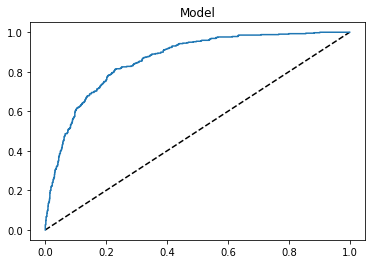

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="lg")
plt.title("Model")
plt.show()

# Grid Search CV

In [76]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [90]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x= mx.fit_transform(x)




for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.788868,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.760897,{'n_estimators': 10}
2,logistic_regression,0.788726,{'C': 5}
3,naive_bayes_gaussian,0.777510,{}
4,naive_bayes_multinomial,0.734630,{}
5,decision_tree,0.720006,{'criterion': 'gini'}


In [135]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [136]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [137]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [138]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [139]:
accuracy

0.7851612903225806

As we can see boosting model is giving more accuracy than cv model.

In [140]:
from sklearn.externals import joblib

In [147]:
#saving the model as pickl
joblib.dump(abc,"Project 35_customer churn.pkl")

['Project 35_customer churn.pkl']